In [1]:
# import numerical packages
import numpy as np
import pandas as pd

In [2]:
#import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#magic command to display plots in jupyter
%matplotlib inline

### Importing and preparing the dataset
***

In [4]:
# load the dataset from scikit-learn library 
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()

In [6]:
# check info axis of the object
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
# check the size and number of columns
boston.data.shape

(506, 13)

In [8]:
# print the column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
# read the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

***
#### Build the dataframe using the boston data and place the feature names as the rows

In [10]:
# Place the feature names as the name of the columns
bdf = pd.DataFrame(boston.data, columns=boston.feature_names)

In [11]:
# check the first 5 rows of the dataframe
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### The 'medv' which is usually the target variable is not included in the dataframe. It is the Median value of owner-occupied homes in $1000's. 
***

In [12]:
# add the target 'medv' as Price column
bdf['Price'] = boston.target

In [13]:
# check for any missing data. isnull() gives back a boolean if there is missing information and sum willadd it all up. 
bdf.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

In [14]:
# get the first 5 rows of the dataframe
bdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Descriptive Statistics
***

In [15]:
# get the summary statistics of the dataset
bdf.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
# list all columns with their data types and the number of non-null values in each column
bdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [17]:
# sns.pairplot(bdf)

#### The pairplot shows data plotted against each other. We can see correlation with our Price to LSTAT and RM. RAD and TAX appear to be correlated as well. 
***


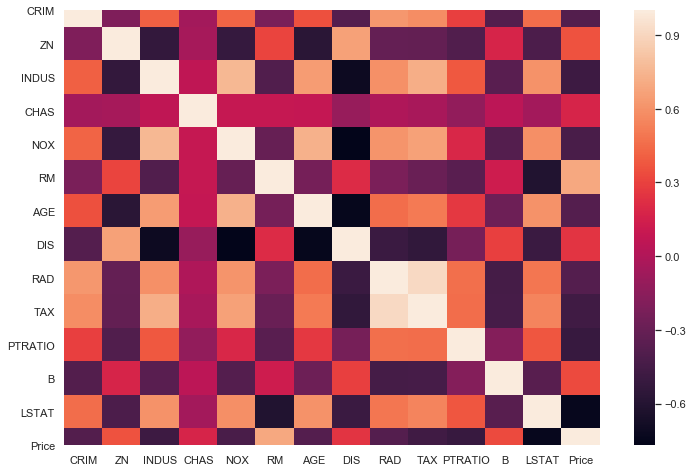

In [18]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(bdf.corr())

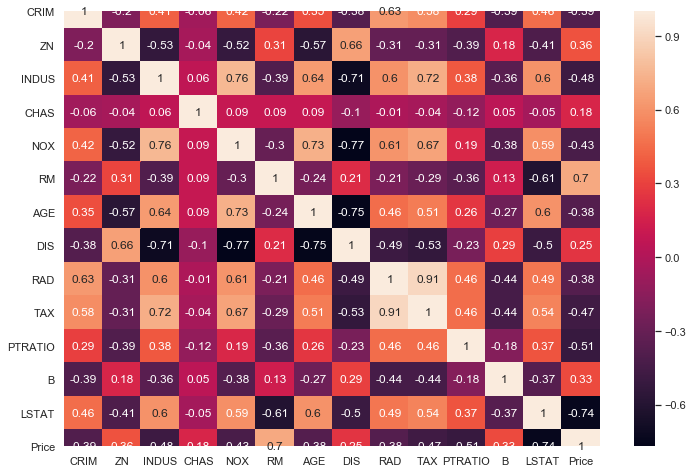

In [19]:
correlation_matrix=bdf.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
# annot=True parameter prints the values inside the square
# values closer to 1 means a strong positive correlation
# values closer to -1 means a strong negative correlation

#### The heatmap appear to show a high correlation between the target variable of Price and two other variables, the percentage of lower status (LSTAT) and average number of rooms per dwelling (Rooms). 
***


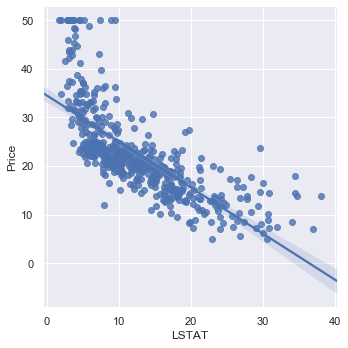

In [20]:
# negative correlation of percentage of lower status (LSTAT) and Price
sns.lmplot(x = 'LSTAT', y = 'Price', data = bdf)

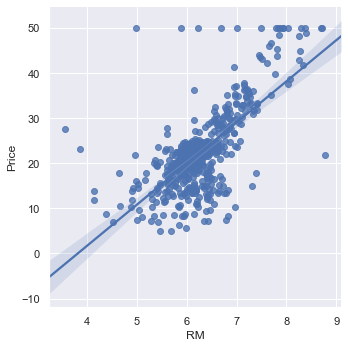

In [21]:
# positive correlation between average number of rooms per dwelling (Rooms) and price. 
sns.lmplot(x = 'RM', y = 'Price', data = bdf)

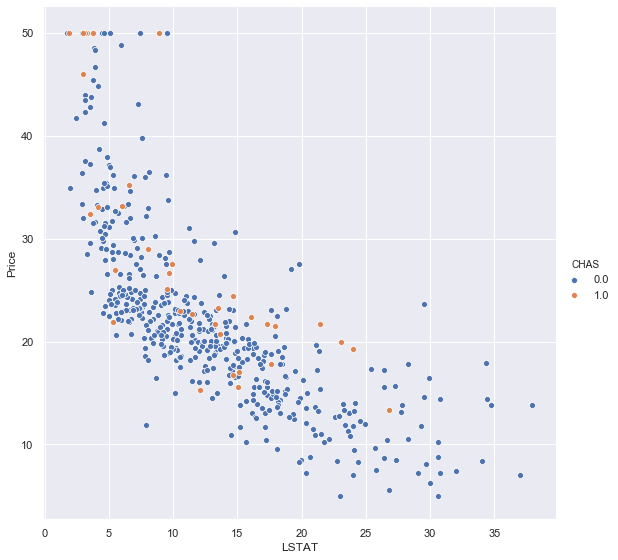

In [22]:
sns.pairplot(data= bdf, hue = 'CHAS',x_vars = 'LSTAT', y_vars = 'Price',height = 8, aspect = 1)

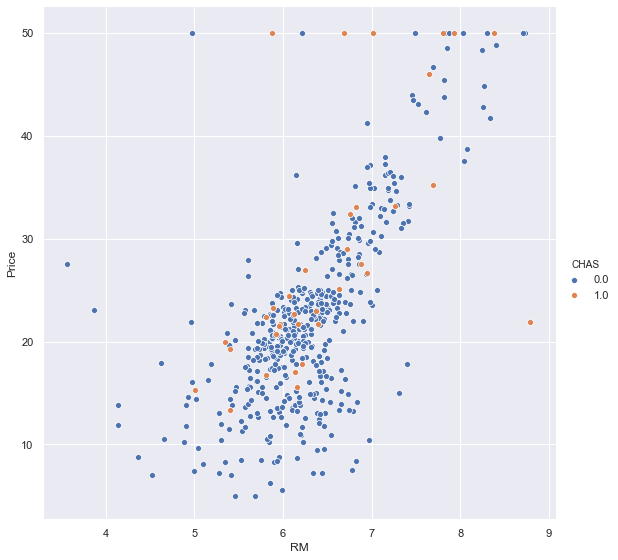

In [23]:
sns.pairplot(data= bdf, hue = 'CHAS',x_vars = 'RM', y_vars = 'Price',height = 8, aspect = 1)

### Inferential Statistics
***

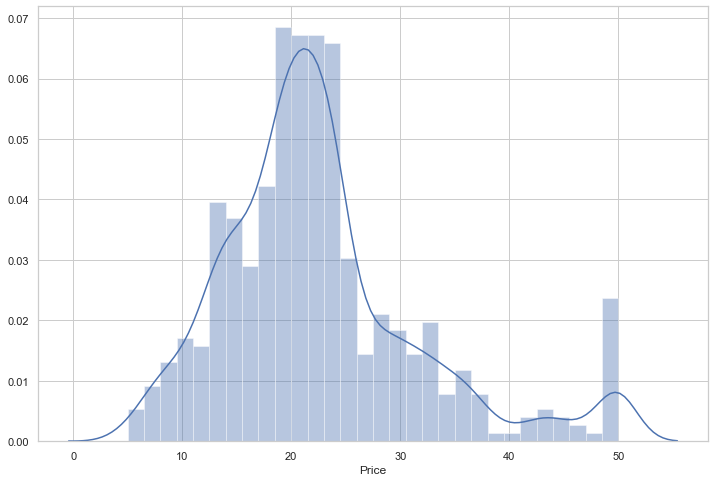

In [24]:
# plot the distribution of Price 
sns.set_style('whitegrid')
sns.distplot(bdf['Price'], bins = 30)

#### The median value or price of houses appear to follow a normal distribution. Some outliers in the 48-50 mark.
***

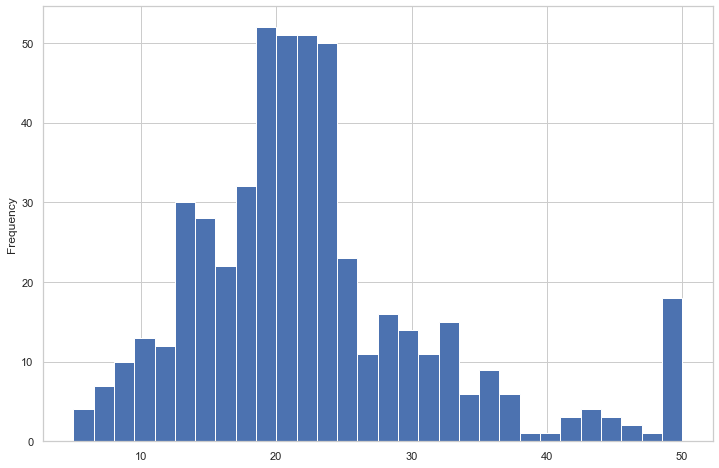

In [25]:
# Another plot similar to above but to get the count on the y-axis rather than the kde. 
bdf['Price'].plot.hist(bins = 30)

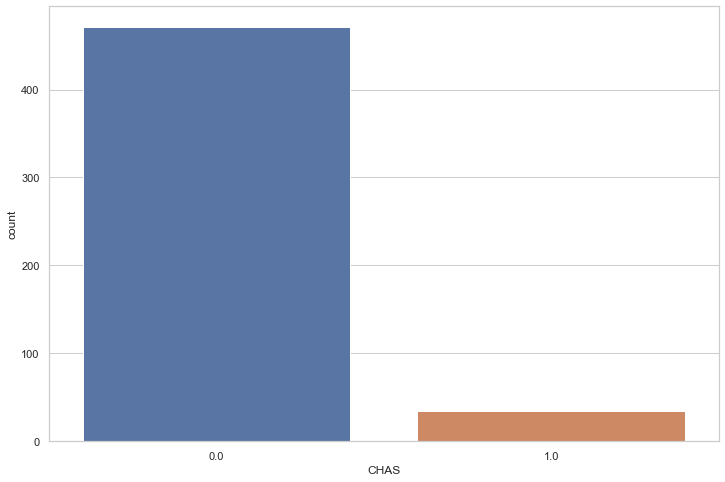

In [26]:
# Plot the houses that do not tract river and those that tract the river. 

sns.countplot(x = 'CHAS', data = bdf)

#### CHAS variable in a countplot. We can see that there are more houses that do not tract the Charles river in our dataset than those that tract the river. 
***

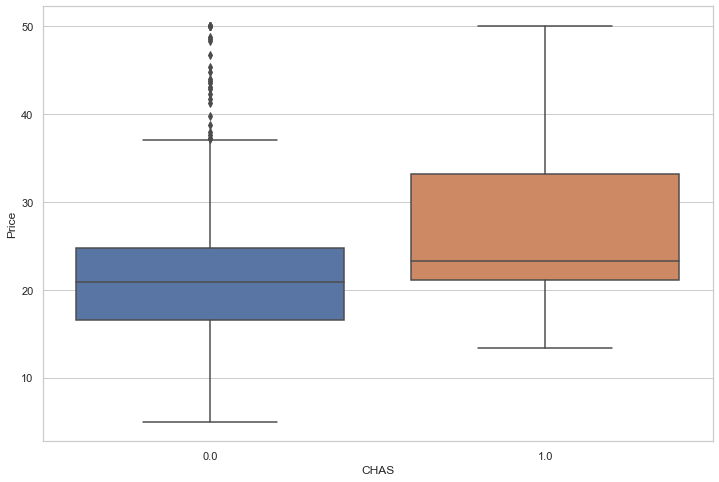

In [27]:
# Boxplot to show means 
sns.boxplot(x = 'CHAS', y= 'Price', data=bdf)

#### The boxplot suggest that in general house prices are higher for houses that tract the river and those that do not. This boxplot shows  that the median house price is higher for those that tract the river. There is some outliers for the houses that do not tract the river, house prices that are unusual relative to the mean highest house price recorded. It also shows that there is some overlap of the house prices. 
***

In [28]:
# sns.pairplot(bdf, hue = 'CHAS')

In [29]:
# slice the dataframe
nr = bdf[bdf['CHAS']== 0.0]
r = bdf[bdf['CHAS']== 1.0]

#### The code above slices the dataframe into nr and r where nr is the dataframe for all data that do not track the river and r is for those that tract the river.
***

In [30]:
# count the variables
nr.count()

CRIM       471
ZN         471
INDUS      471
CHAS       471
NOX        471
RM         471
AGE        471
DIS        471
RAD        471
TAX        471
PTRATIO    471
B          471
LSTAT      471
Price      471
dtype: int64

In [31]:
r.count()

CRIM       35
ZN         35
INDUS      35
CHAS       35
NOX        35
RM         35
AGE        35
DIS        35
RAD        35
TAX        35
PTRATIO    35
B          35
LSTAT      35
Price      35
dtype: int64

In [32]:
r

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82,13.4
152,1.12658,0.0,19.58,1.0,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12,15.3
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12,17.0
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,15.6
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50,27.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66,24.4
209,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09,20.0
210,0.17446,0.0,10.59,1.0,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27,21.7


In [33]:
# Don't know if this is needed
df1 = nr['Price']
df2 = r['Price']

In [34]:
# Don't know if this is needed
df3 = pd.concat([df1,df2])
river = ['near']*471 + ['away']*35
df4 = pd.DataFrame({'River Charles': river, 'price': df3})
df4

,River Charles,price
0,near,24.0
1,near,21.6
2,near,34.7
3,near,33.4
4,near,36.2
...,...,...
363,away,16.8
364,away,21.9
369,away,50.0
370,away,50.0


In [35]:
# Don't know if this is needed
df4[df4['River Charles']=='away']['price']

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: price, dtype: float64

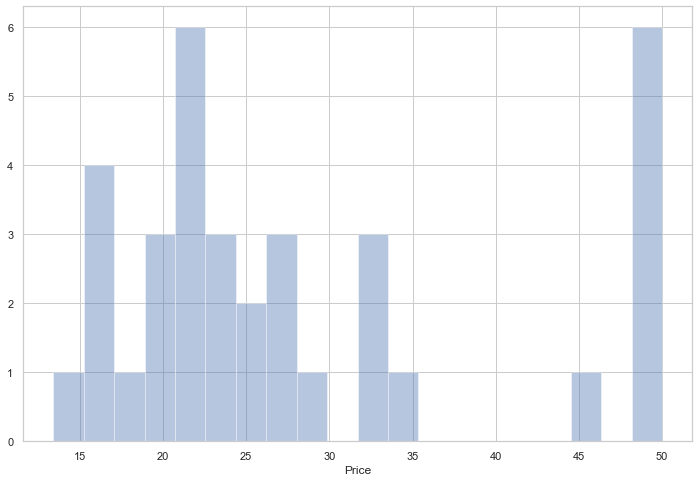

In [36]:
# plot of house prices that track the river
sns.distplot(r['Price'],bins = 20, kde = False)

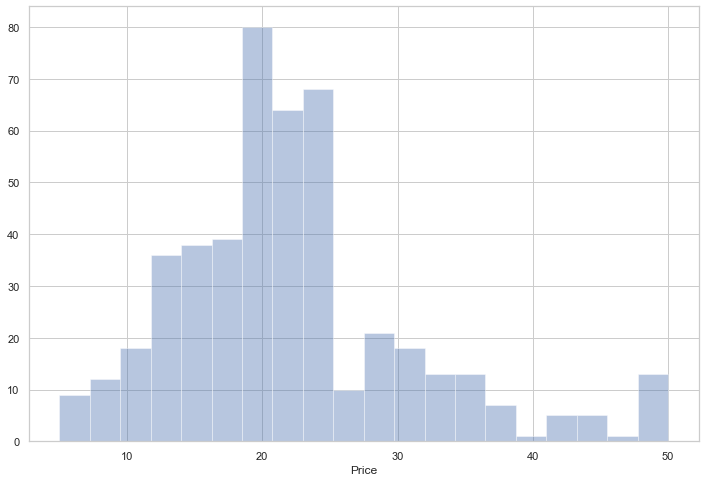

In [37]:
# plot for houses that do not track the river
sns.distplot(nr['Price'], bins = 20, kde = False)

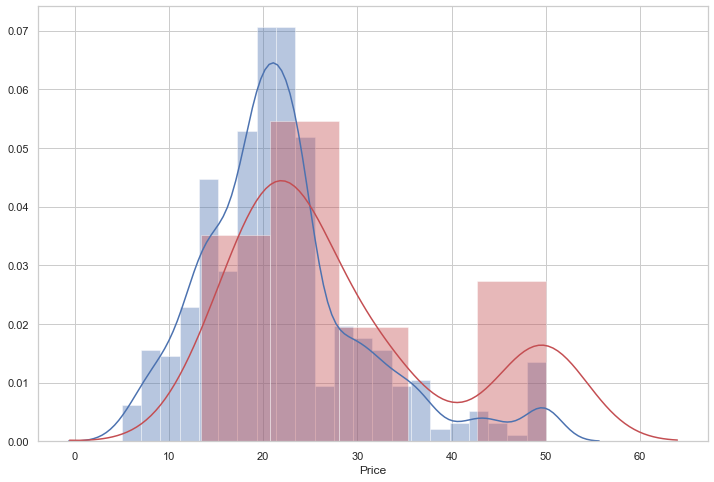

In [38]:
sns.distplot(nr['Price'])
sns.distplot(r['Price'], color = 'r' )

#### The plot above shows the house prices of both the houses that tract the river and those that do not tract the river, superimposed over each other. The blue plot is for the houses that do not tract the river and the red plot is for the houses that tract the river. Both plots appear to be normally distributed. Both also appear to have the top of the kde to be at a similar price range and that may suggest similar means. The two proceeding codes below say otherwise. Another look back at the plot above show that there is a second 'curve' for the red plot, that there is a proportion of houses that have high value, and that proportion is large enough to skew the mean higher. 

In [39]:
# get the mean for house prices that do not tract the river
nr.mean()['Price']

22.093842887473482

In [40]:
# get the mean for house prices that tract the river
r.mean()['Price']

28.44

#### t-test and anova t-test

In [41]:
# import package for ttest
import scipy.stats as stats

In [42]:
# test for significant difference of both groups of house prices
print(stats.ttest_ind(nr['Price'], r['Price'] ))

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)


#### The independent t-test is used to determine if there is a statistically significant difference between the means of the house price groups. The house prices visually appear to approximate normal distribution, although no testing is done with respect to normality such as the Shapiro-Wilks test, it is assumed that the t-test is a robust test with respect to assumption of normality (Laerd).  The result is a very small pvalue (< 0.05) that suggest that there is a only a very small chance that we can have a similar group of data if the means are equal. Therefore we reject the null hypothesis and accept the means as not equal. Below is a one-way anova of the same samples. Although anova is preferred for 3 or more groups, it was used just as a test for the former t-test. 
***

In [43]:
stats.f_oneway(nr['Price'], r['Price'])

F_onewayResult(statistic=15.971512420371955, pvalue=7.390623170520815e-05)

#### Due to difference in sample sizes it seemed appropriate to check for homogeneity of variance [2]. Although it is not understood fully, further study regarding the impact of this area maybe necessary.  

#### Levene's test suggest that the variances are not equal. Due to the pvalue smaller than 0.05, we reject the null hypothesis. 

In [44]:
stats.levene(nr['Price'], r['Price'])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

#### Below is a t-test for unequal variances and it shows a pvalue smaller than 0.05. The null hypothesis is therefore rejected. Although a similar conclusion is reached with the t-test that assumes equal variance, the pvalue is significantly different.  Unfortunately, it is beyond my understanding to explain the significance of this difference.  

In [45]:
stats.ttest_ind(nr['Price'], r['Price'], equal_var=False, axis=0)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

### is this needed

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = bdf[['Price','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT']]
y = bdf['CHAS']


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)


C:\Users\james\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       115
         1.0       1.00      0.67      0.80        12

    accuracy                           0.97       127
   macro avg       0.98      0.83      0.89       127
weighted avg       0.97      0.97      0.97       127



### Predictions

In [54]:
import keras as kr

Using TensorFlow backend.


In [55]:
import sklearn.preprocessing as pre
# For splitting data sets
import sklearn.model_selection as mod
# For whitening
import sklearn.decomposition as dec

In [56]:
# split the dataset into an input array and an output array
x = bdf[['CHAS','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]
y = bdf['Price']

In [57]:
x

,CHAS,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.0,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.0,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.0,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.0,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [58]:
# split the dataset into testing and training data using mod
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2)

### Building and Training

#### The dataset is put through the neural network without preprocesing and scaling. 

In [59]:
# Begin a neural network and build with layers.
# create an instance of the function
m = kr.models.Sequential()


#### Built neural network with one layer of hidden neurons as suggested from universal approximation theorem [3]

In [60]:
# one hidden layer with neurons with 13 input neurons with relu as activation function
m.add(kr.layers.Dense(40, input_dim=13, activation="relu"))
# one single neuron in the output layer with an activation function of linear so that the  output is not restricted
m.add(kr.layers.Dense(1, activation="linear"))
# standard loss function and optimizer 
m.compile(loss="mean_squared_error", optimizer="adam")

In [61]:
m.fit(x_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 0s 959us/step - loss: 413.2166
Epoch 2/100
404/404 [==============================] - 0s 133us/step - loss: 103.8950
Epoch 3/100
404/404 [==============================] - 0s 120us/step - loss: 84.5641
Epoch 4/100
404/404 [==============================] - 0s 143us/step - loss: 75.9276
Epoch 5/100
404/404 [==============================] - 0s 109us/step - loss: 71.2089
Epoch 6/100
404/404 [==============================] - 0s 133us/step - loss: 63.7524
Epoch 7/100
404/404 [==============================] - 0s 128us/step - loss: 58.1388
Epoch 8/100
404/404 [==============================] - 0s 131us/step - loss: 55.2219
Epoch 9/100
404/404 [==============================] - 0s 116us/step - loss: 52.0917
Epoch 10/100
404/404 [==============================] - 0s 136us/step - loss: 48.9302
Epoch 11/100
404/404 [==============================] - 0s 128us/step - loss: 46.8753
Epoch 12/100
404/404 [==============================] - 0s 12

404/404 [==============================] - 0s 116us/step - loss: 30.0837
Epoch 97/100
404/404 [==============================] - 0s 106us/step - loss: 29.6738
Epoch 98/100
404/404 [==============================] - 0s 109us/step - loss: 29.2053
Epoch 99/100
404/404 [==============================] - 0s 104us/step - loss: 29.1846
Epoch 100/100
404/404 [==============================] - 0s 111us/step - loss: 29.0697


In [62]:
# predictions on the test set
m.predict(x_test).round().T

array([[26., 20., 35., 12., 15., 19., 22., 26., 13., 27.,  9., 20., 25.,
        35., 26., 19.,  8., 31., 25., 29., 22., 17., 28., 17., 14., 34.,
        10., 24., 21., 26., 27.,  4., 27., 34., 22., 21., 18., 26., 22.,
        20., 24., 24., 24., 25.,  4., 26., 26., 26., 18., 25., 17., 25.,
        21., 16., 30., 22., 17.,  7., 12., 25., 25., 18., 25., 18., 24.,
        28., 21., 13., 20., 23., 19., 26., 20., 35., 29., 29., 15., 23.,
        11., 20., 28., 31., 21., 24., 32., 25., 25., 21., 36., 17., 30.,
        31., 23., 13., 14., 33., 29., 14., 21., 27., 33., 16.]],
      dtype=float32)

In [63]:
# actual values from the test set
y_test.as_matrix().astype(np.float32)

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([23.7, 21.7, 39.8, 17.2, 14.9, 21.4, 16.8, 23.8, 13.1, 24.4,  5.6,
       19.9, 22.7, 37.6, 23.9, 20. , 15.7, 35.2, 18.7, 34.7, 20. , 14.3,
       30.5, 13. , 15.6, 50. , 10.2, 15.3, 18.8, 23.4, 20.6,  8.8, 24.6,
       44.8, 22.4, 18.7, 15.2, 21.6, 18.9, 21. , 23.1, 21.5, 23.3, 19. ,
        8.4, 22.6, 22.6, 23.8, 12.6, 18.5, 14.9, 22.7, 20.1, 19.9, 24.6,
       19.1, 27.5, 13.5,  7. , 24.7, 30.3, 16.4, 22.8, 19.5, 23.9, 24.7,
       23.8, 13.6, 17.1, 22. , 16.7, 21. , 20.6, 43.5, 22.8, 23.6, 15.4,
       20.2,  7.5, 18.3, 24.1, 23.6, 16.8, 19.4, 41.3, 28.6, 25. , 21. ,
       36. , 14.1, 34.9, 23.5, 22.6, 12.3, 13.1, 34.9, 32. , 19.1, 23. ,
       26.6, 35.4,  9.6], dtype=float32)

#### The two preceeding code cells show the predictions and the actual values from the test set. Comparing the two we can see that the predictions are somewhat still off. Although some predictions are close to the actual, some are 10 to 20 points off. Below is the evaluate function and we can see the output loss is still high.

In [64]:
# calculates loss function mse, the higher the output, the worst
m.evaluate(x_test, y_test)

102/102 [==============================] - 0s 411us/step


19.4326919854856

### Scaling 

#### Preprocessing the data to transform them into a representation that is more suitable for the neural network [4]. This will hopefully improve the output and come out with a lower loss output during evaluation. 

In [93]:

scaler = pre.StandardScaler()
# scales the x_train variables by taking the mean of the column and taking it away from each of the values divided by the standard dviation  
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

In [102]:
# see how the dataset looks like when scaled with column names
x_train_scaled_df = pd.DataFrame(x_train_scaled, columns = x.columns)
x_train_scaled_df

,CHAS,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.278089,-0.408219,-0.503319,0.128189,0.194680,-0.230821,0.303696,-0.727246,-0.985735,-0.793965,1.159671,0.431742,-0.494690
1,-0.278089,-0.405717,-0.503319,-1.197538,-0.928887,1.567688,-0.198131,-0.168639,-0.870537,-0.776102,-0.252204,0.431742,-0.892383
2,-0.278089,0.572235,-0.503319,1.033027,1.309469,-1.041261,1.127118,-1.054306,1.663802,1.546101,0.783171,0.431742,1.503405
3,-0.278089,-0.399006,-0.503319,-0.366026,-0.270547,-0.221107,0.604086,-0.803611,-0.524946,-0.133030,1.112608,0.332545,0.194735
4,-0.278089,-0.407019,-0.503319,0.260175,-0.999110,-0.075395,-0.509123,0.533909,-0.524946,-0.049669,0.077234,0.318651,-0.046082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.278089,-0.407066,-0.503319,-1.260598,-0.551439,2.143599,-0.512657,-0.305551,-0.755340,-1.270314,-0.346329,0.385752,-1.131824
400,-0.278089,-0.330171,-0.503319,-0.427619,-0.112546,0.289581,0.929214,0.275165,-0.640143,-0.591516,1.159671,0.335238,0.017218
401,-0.278089,-0.398003,-0.503319,-0.068324,-0.542661,0.123052,-1.265399,0.039595,-0.640143,-0.770147,0.030171,0.312297,-0.453407
402,-0.278089,-0.344653,-0.503319,-0.427619,-0.112546,-0.264127,0.579348,0.278496,-0.640143,-0.591516,1.159671,0.249935,-0.332311


In [94]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [95]:
m.fit(x_train_scaled, y_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 0s 697us/step - loss: 593.2734
Epoch 2/100
404/404 [==============================] - 0s 109us/step - loss: 558.1554
Epoch 3/100
404/404 [==============================] - 0s 113us/step - loss: 524.2873
Epoch 4/100
404/404 [==============================] - 0s 120us/step - loss: 488.6676
Epoch 5/100
404/404 [==============================] - 0s 116us/step - loss: 450.8412
Epoch 6/100
404/404 [==============================] - 0s 118us/step - loss: 410.5149
Epoch 7/100
404/404 [==============================] - 0s 128us/step - loss: 368.5206
Epoch 8/100
404/404 [==============================] - 0s 118us/step - loss: 326.1507
Epoch 9/100
404/404 [==============================] - 0s 126us/step - loss: 283.4335
Epoch 10/100
404/404 [==============================] - 0s 118us/step - loss: 241.7170
Epoch 11/100
404/404 [==============================] - 0s 116us/step - loss: 202.5682
Epoch 12/100
404/404 [==============================

404/404 [==============================] - 0s 96us/step - loss: 13.2679
Epoch 97/100
404/404 [==============================] - 0s 99us/step - loss: 13.1207
Epoch 98/100
404/404 [==============================] - 0s 96us/step - loss: 13.0711
Epoch 99/100
404/404 [==============================] - 0s 96us/step - loss: 12.9381
Epoch 100/100
404/404 [==============================] - 0s 96us/step - loss: 12.8684


In [70]:
x_test_scaled = scaler.transform(x_test)
m.predict(x_test_scaled).round().T

array([[26., 22., 41., 13., 16., 23., 28., 24., 18., 26.,  6., 20., 28.,
        42., 24., 18., 17., 37., 20., 35., 23., 16., 29., 14., 10., 40.,
        18., 25., 18., 24., 21., 13., 25., 44., 26., 18., 16., 24., 17.,
        18., 21., 22., 25., 21.,  6., 27., 24., 24., 17., 24., 16., 21.,
        22., 20., 27., 21., 14., 12., 15., 22., 33., 16., 26., 17., 25.,
        26., 23., 15., 21., 20., 18., 22., 20., 43., 20., 27., 13., 22.,
         8., 17., 25., 33., 19., 21., 33., 29., 25., 20., 36., 15., 35.,
        27., 24., 12., 15., 31., 31., 14., 22., 29., 37., 12.]],
      dtype=float32)

In [71]:
y_test.as_matrix().astype(np.float32)

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([23.7, 21.7, 39.8, 17.2, 14.9, 21.4, 16.8, 23.8, 13.1, 24.4,  5.6,
       19.9, 22.7, 37.6, 23.9, 20. , 15.7, 35.2, 18.7, 34.7, 20. , 14.3,
       30.5, 13. , 15.6, 50. , 10.2, 15.3, 18.8, 23.4, 20.6,  8.8, 24.6,
       44.8, 22.4, 18.7, 15.2, 21.6, 18.9, 21. , 23.1, 21.5, 23.3, 19. ,
        8.4, 22.6, 22.6, 23.8, 12.6, 18.5, 14.9, 22.7, 20.1, 19.9, 24.6,
       19.1, 27.5, 13.5,  7. , 24.7, 30.3, 16.4, 22.8, 19.5, 23.9, 24.7,
       23.8, 13.6, 17.1, 22. , 16.7, 21. , 20.6, 43.5, 22.8, 23.6, 15.4,
       20.2,  7.5, 18.3, 24.1, 23.6, 16.8, 19.4, 41.3, 28.6, 25. , 21. ,
       36. , 14.1, 34.9, 23.5, 22.6, 12.3, 13.1, 34.9, 32. , 19.1, 23. ,
       26.6, 35.4,  9.6], dtype=float32)

In [72]:
m.evaluate(x_test_scaled, y_test)

102/102 [==============================] - 0s 450us/step


12.701409667145972

### Whitening

In [73]:
pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train)
x_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
x_train_white

,CHAS,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.782996,0.014757,-0.978490,-0.071232,-0.084645,-0.303254,0.985289,0.159106,1.590372,-1.409711,0.400901,-0.265114,0.842399
1,-0.775511,0.005882,-0.550174,-0.619231,-0.002745,-1.058699,-0.618071,1.337365,-0.154313,-1.003798,-1.315699,-0.363805,-0.774719
2,1.360168,-1.434782,-0.292812,0.412536,-0.067813,0.710698,-0.976684,-0.656348,-0.197519,-0.338175,0.351793,-0.267533,0.232614
3,-0.163009,-0.285366,-0.816745,0.138234,-0.416716,-0.034040,-0.523095,1.392132,1.122669,-1.786636,0.051202,-0.059665,-0.545249
4,-0.100449,-0.318362,0.068140,-1.095040,-0.377643,0.527344,0.681471,0.823208,0.016255,0.901593,-0.548942,-0.165369,-1.566433
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-1.220714,0.362405,-0.593022,-0.872154,0.390915,-1.176953,-0.652336,-0.267682,-0.246206,-1.298143,-1.760540,-0.591193,0.295122
400,-0.575001,-0.006075,-1.320922,0.581114,-0.098262,-0.391005,-0.548708,0.672913,1.771280,0.375563,-0.693379,-0.217893,0.596388
401,-0.764010,0.136067,0.229986,-1.785637,0.229776,0.462104,0.693913,-0.639630,-0.138187,-0.527693,-0.304992,-0.277036,-0.038331
402,-0.566860,0.088595,-1.043882,0.189709,-0.133900,-0.618402,-0.274404,0.604466,1.764676,0.248645,0.307473,-0.143750,0.776228


In [74]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(60, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(40, activation="tanh"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

In [75]:
m.fit(x_train_white, y_train, epochs=100, batch_size=10)

Epoch 1/100
404/404 [==============================] - 0s 1ms/step - loss: 528.3662
Epoch 2/100
404/404 [==============================] - 0s 126us/step - loss: 360.3918
Epoch 3/100
404/404 [==============================] - 0s 126us/step - loss: 246.3136
Epoch 4/100
404/404 [==============================] - ETA: 0s - loss: 192.059 - 0s 166us/step - loss: 184.8257
Epoch 5/100
404/404 [==============================] - 0s 147us/step - loss: 149.2842
Epoch 6/100
404/404 [==============================] - 0s 131us/step - loss: 126.3484
Epoch 7/100
404/404 [==============================] - 0s 146us/step - loss: 110.2241
Epoch 8/100
404/404 [==============================] - 0s 180us/step - loss: 97.7324
Epoch 9/100
404/404 [==============================] - 0s 167us/step - loss: 87.9281
Epoch 10/100
404/404 [==============================] - 0s 148us/step - loss: 79.4330
Epoch 11/100
404/404 [==============================] - 0s 151us/step - loss: 73.0090
Epoch 12/100
404/404 [==========

404/404 [==============================] - 0s 133us/step - loss: 1.9580
Epoch 97/100
404/404 [==============================] - 0s 136us/step - loss: 1.9356
Epoch 98/100
404/404 [==============================] - 0s 121us/step - loss: 1.8973
Epoch 99/100
404/404 [==============================] - 0s 123us/step - loss: 1.8352
Epoch 100/100
404/404 [==============================] - 0s 121us/step - loss: 1.8284


In [96]:
x_test_white = scaler.transform(x_test)
m.predict(x_test_white).round().T

array([[27., 23., 41., 15., 15., 22., 26., 24., 17., 27.,  6., 18., 27.,
        43., 25., 18., 17., 38., 21., 33., 23., 15., 27., 14., 11., 41.,
        17., 22., 19., 24., 22., 12., 25., 45., 25., 19., 16., 25., 17.,
        19., 21., 24., 24., 21.,  4., 27., 24., 24., 16., 23., 15., 20.,
        21., 19., 27., 20., 14., 11., 17., 22., 34., 15., 26., 18., 25.,
        25., 23., 14., 21., 22., 17., 21., 23., 43., 22., 28., 14., 21.,
         8., 17., 24., 33., 19., 21., 34., 28., 23., 19., 38., 15., 33.,
        26., 23., 14., 15., 31., 29., 16., 23., 29., 35., 13.]],
      dtype=float32)

In [97]:
y_test.as_matrix().astype(np.float32)

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([23.7, 21.7, 39.8, 17.2, 14.9, 21.4, 16.8, 23.8, 13.1, 24.4,  5.6,
       19.9, 22.7, 37.6, 23.9, 20. , 15.7, 35.2, 18.7, 34.7, 20. , 14.3,
       30.5, 13. , 15.6, 50. , 10.2, 15.3, 18.8, 23.4, 20.6,  8.8, 24.6,
       44.8, 22.4, 18.7, 15.2, 21.6, 18.9, 21. , 23.1, 21.5, 23.3, 19. ,
        8.4, 22.6, 22.6, 23.8, 12.6, 18.5, 14.9, 22.7, 20.1, 19.9, 24.6,
       19.1, 27.5, 13.5,  7. , 24.7, 30.3, 16.4, 22.8, 19.5, 23.9, 24.7,
       23.8, 13.6, 17.1, 22. , 16.7, 21. , 20.6, 43.5, 22.8, 23.6, 15.4,
       20.2,  7.5, 18.3, 24.1, 23.6, 16.8, 19.4, 41.3, 28.6, 25. , 21. ,
       36. , 14.1, 34.9, 23.5, 22.6, 12.3, 13.1, 34.9, 32. , 19.1, 23. ,
       26.6, 35.4,  9.6], dtype=float32)

In [98]:
m.evaluate(x_test_white, y_test)

102/102 [==============================] - 0s 410us/step


11.274693068336038

#### if the final loss in the training set but very high on the test evaluation, it means that there is too many neurons and it is training too tighly at the espense of generalising.   

## References: 

1.  Laerd Statistics. 
https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php
2.  Kent State University.
https://libguides.library.kent.edu/SPSS/IndependentTTest
3. Wikipedia. https://en.wikipedia.org/wiki/Universal_approximation_theorem
4. Scikit-learn.org.https://scikit-learn.org/stable/modules/preprocessing.html

In [91]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [92]:
bdf[0:50]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [86]:
encoder = pre.LabelBinarizer()
encoder.fit(bdf['CHAS'])
outputs = encoder.transform(bdf['CHAS'])
outputs

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    